# **Analysing Data - Assignment 1 - Lise Feringa**

# Part 1.1

For this exercise, I will analyze texts in a dataset by **splitting sentences and applying word tokenization**. The results will be reported as statistics of word frequency (per story and in total) in a **python dictionary** and plotted in the form of a **histogram**. 

> Note: the dataset used for this assignment contains of fanfiction stories based on the British sci-fi TV series _Doctor Who_. The stories revolve around 'what if' scenarios that make up alternate interpretations of fans of canon events in the show. 

### Importing and Downloading 

In [90]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

In [83]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/liseferinga/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/liseferinga/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [84]:
files = [f'{str(i).zfill(2)}.txt' for i in range(1, 6)]
stop_words = set(stopwords.words('english'))
sentences_dict = {}
words_dict = {}
freq_dict = {}

### Function of processing each story **(cleaned + lowercased)** and getting the top 25 most used words

In [85]:
for file in files:
    with open(file, 'r', encoding='utf-8') as f:
        text = f.read()        

    story_name = file
    
    # Sentence splitting
    sentences = sent_tokenize(text)
    sentences_dict[story_name] = sentences

    # Word tokenization
    words = word_tokenize(text.lower())
    words = [w for w in words if w.isalpha() and w not in stop_words]
    words_dict[story_name] = words

    # Word frequency
    freq_dict[story_name] = Counter(words)

    # Total frequency across all stories
total_freq = sum(freq_dict.values(), Counter())

In [99]:
# Top 25 per story 
top25_per_story = {
    story: dict(freq.most_common(25))
    for story, freq in freq_dict.items()
}

# Top 25 in total 
top25_total = dict(total_freq.most_common(25))

# Plot results 
def plot_top_words(counter, title):
    top_words = counter.most_common(25)
    words, counts = zip(*top_words)

    plt.figure(figsize=(12, 8))
    plt.barh(words, counts, color="lightpink")
    plt.gca().invert_yaxis() 
    
    plt.xlabel("Frequency", fontsize=12)
    plt.ylabel("Words", fontsize=12)
    plt.title(title, fontsize=14, fontweight='bold')
    
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()




***

# Part 1.1 - Results 

### **Dictionary 1** : top 25 words per story

In [100]:
print("Top 25 Words Per Story:")
print(top25_per_story)

Top 25 Words Per Story:
{'01.txt': {'river': 11, 'missy': 10, 'maps': 5, 'sitting': 3, 'chair': 3, 'placing': 3, 'house': 2, 'map': 2, 'people': 2, 'looked': 2, 'smiled': 2, 'still': 2, 'place': 2, 'smiles': 2, 'leans': 2, 'kiss': 2, 'smile': 2, 'table': 2, 'cup': 2, 'coffee': 2, 'little': 2, 'turned': 2, 'another': 1, 'plot': 1, 'papers': 1}, '02.txt': {'back': 6, 'wanted': 5, 'come': 4, 'smiled': 4, 'looked': 3, 'eyes': 3, 'look': 3, 'got': 3, 'loved': 3, 'day': 3, 'used': 3, 'wished': 3, 'children': 3, 'left': 3, 'river': 3, 'told': 2, 'sat': 2, 'man': 2, 'want': 2, 'something': 2, 'well': 2, 'doctor': 2, 'bit': 2, 'fall': 2, 'one': 2}, '03.txt': {'rose': 25, 'doctor': 20, 'time': 15, 'one': 10, 'would': 10, 'energy': 8, 'vortex': 8, 'long': 8, 'hand': 8, 'much': 8, 'face': 8, 'want': 7, 'could': 7, 'two': 7, 'back': 7, 'safe': 6, 'tell': 6, 'like': 6, 'wolf': 6, 'regeneration': 5, 'matter': 5, 'let': 5, 'still': 5, 'help': 5, 'eyes': 5}, '04.txt': {'doctor': 30, 'rose': 21, 'martha

### **Dictionary 2** : top 25 words across all stories

In [101]:
print("\nTop 25 Words Across all Stories:")
print(top25_total)


Top 25 Words Across all Stories:
{'doctor': 83, 'rose': 46, 'time': 32, 'could': 29, 'back': 27, 'like': 25, 'eyes': 24, 'would': 23, 'martha': 20, 'face': 19, 'know': 18, 'one': 17, 'smile': 16, 'let': 16, 'tardis': 16, 'yet': 15, 'two': 15, 'knew': 15, 'much': 15, 'hand': 15, 'around': 14, 'river': 14, 'even': 14, 'felt': 14, 'always': 14}


### **Histogram 1** : Top 25 Words Per Story 

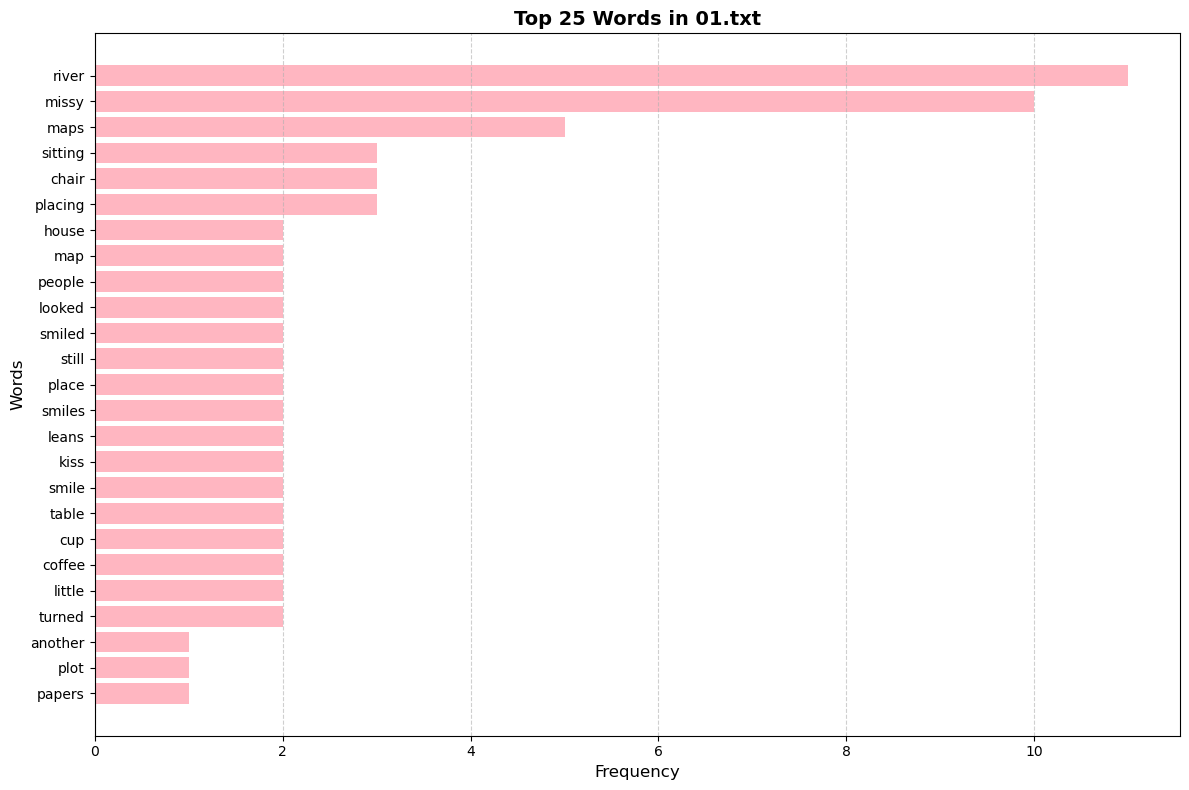

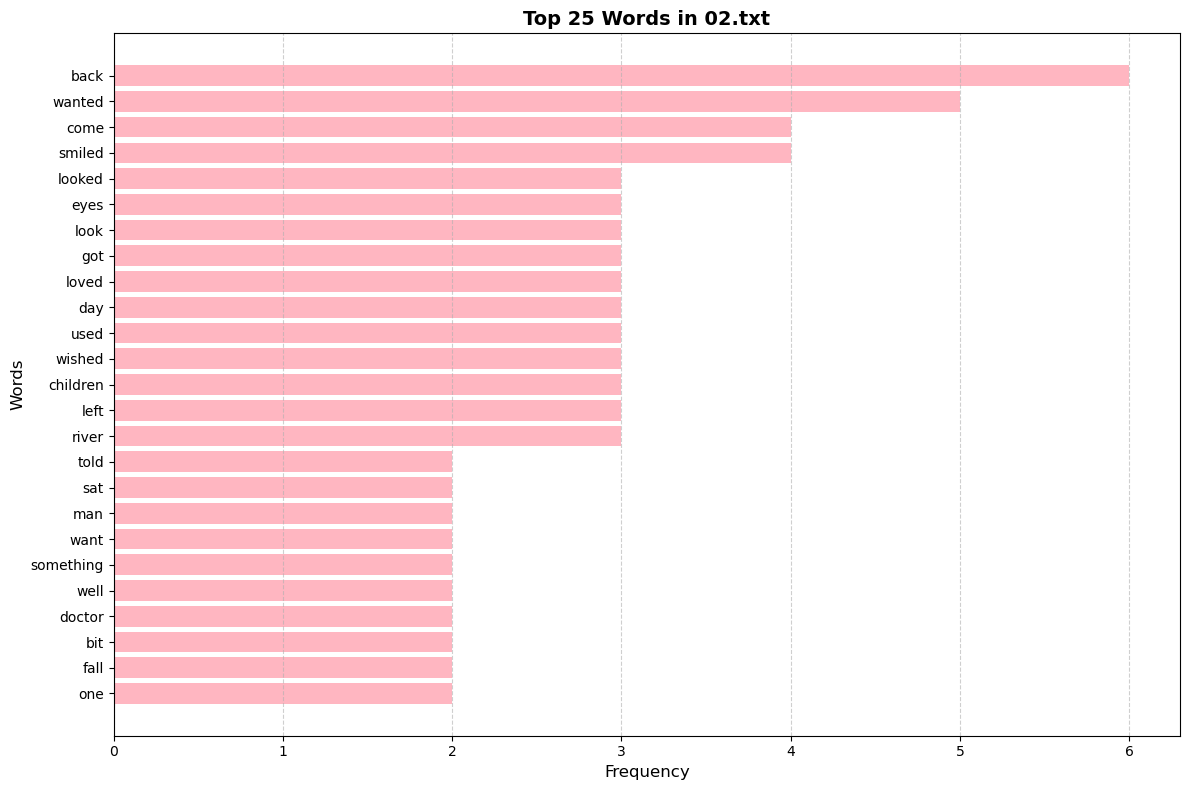

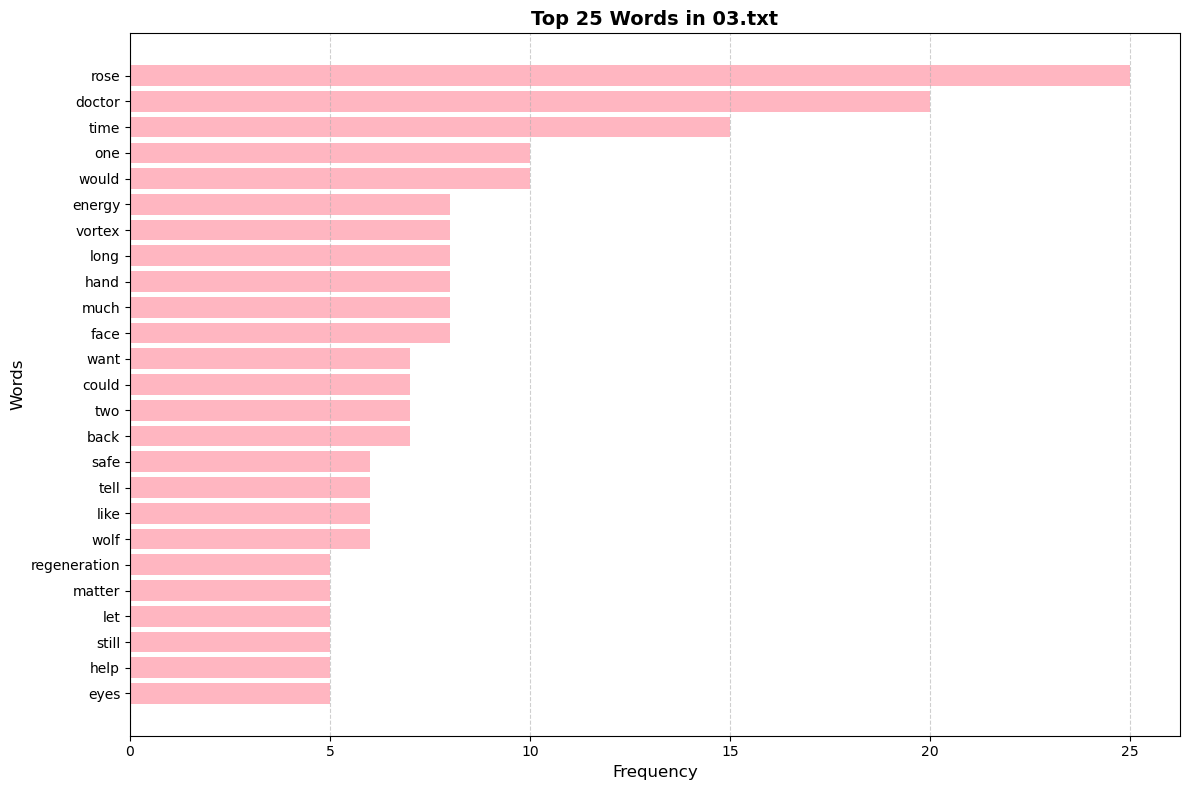

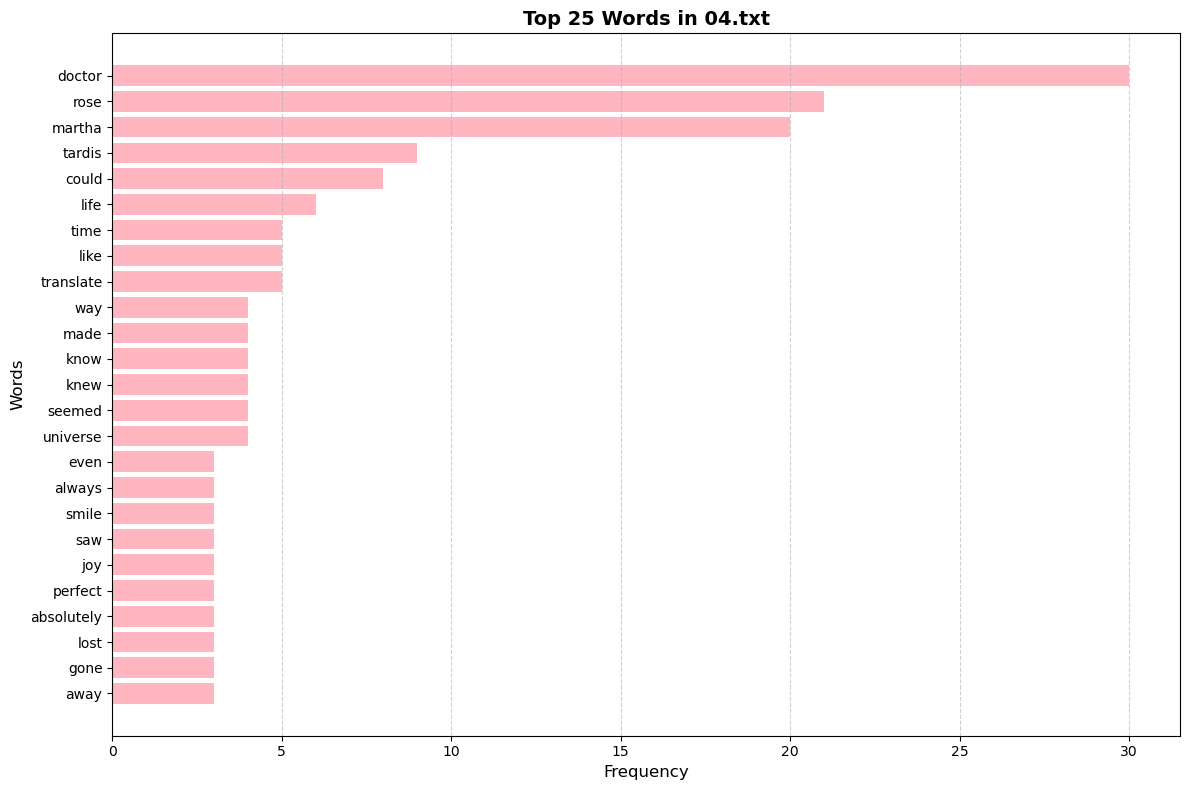

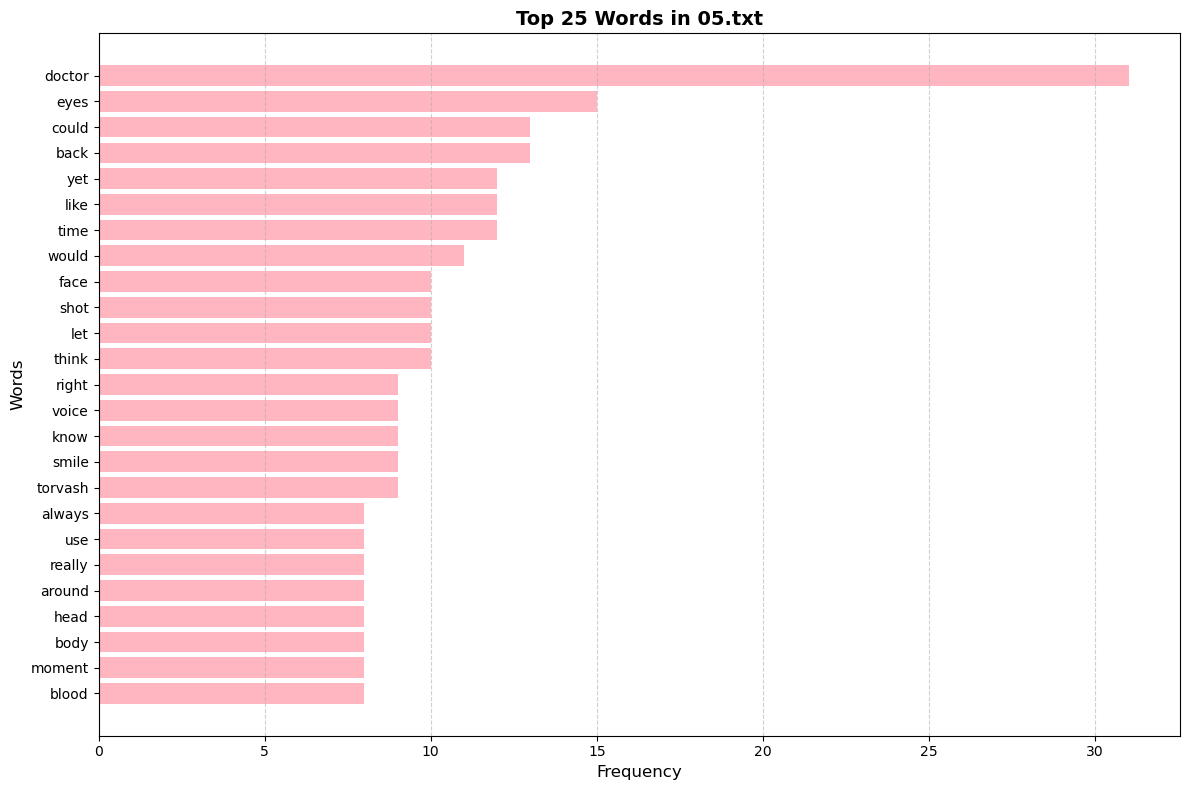

In [102]:
for story, freq in freq_dict.items():
    plot_top_words(freq, f"Top 25 Words in {story}")

### **Histogram 2** : Top 25 Words Across All Stories 

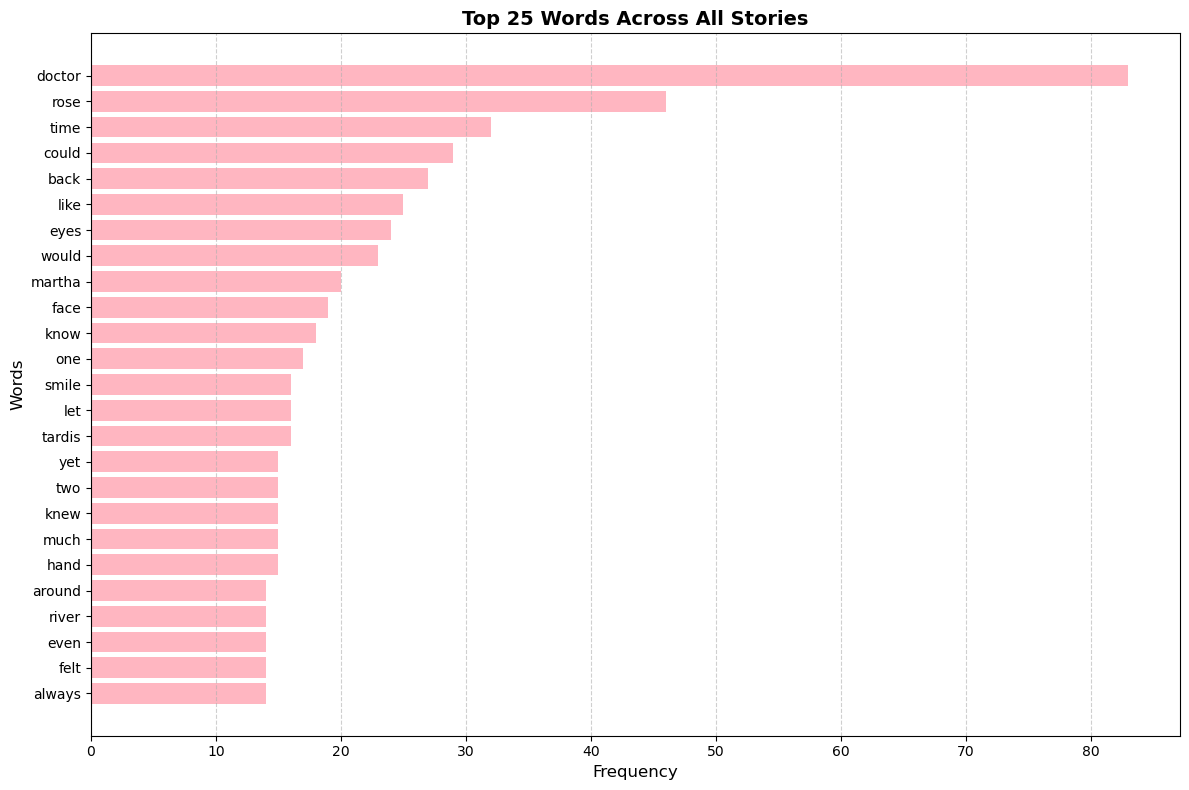

In [103]:
plot_top_words(total_freq, "Top 25 Words Across All Stories")

# Part 1.2

For the second exercise, I will perform **stemming** on the texts using Porter and Lancaster stemmer. I will re-create the statistics and the plot from exercise 1 with the stemmed texts. 

### Import Stemming methods

In [66]:
from nltk.stem import PorterStemmer, LancasterStemmer
from collections import Counter
import matplotlib.pyplot as plt

porter = PorterStemmer()
lancaster = LancasterStemmer()

In [ ]:
freq_porter = {}
freq_lancaster = {}

### Applying stemming per story and in total 

In [ ]:
for story_name, words in words_dict.items():
    # Porter stemming
    porter_words = [porter.stem(w) for w in words]
    freq_porter[story_name] = Counter(porter_words)
    
    # Lancaster stemming
    lancaster_words = [lancaster.stem(w) for w in words]
    freq_lancaster[story_name] = Counter(lancaster_words)

total_porter = sum(freq_porter.values(), Counter())
total_lancaster = sum(freq_lancaster.values(), Counter())

### Functions to plot and make dictionaries  

In [71]:
def plot_top_words(counter, title):
    top_words = counter.most_common(25)
    words, counts = zip(*top_words)
    plt.figure(figsize=(12,6))
    plt.bar(words, counts, color='lightpink')
    plt.xticks(rotation=45)
    plt.title(title)
    plt.show()

total_unstemmed = sum(freq_dict.values(), Counter())
total_porter = sum(freq_porter.values(), Counter())
total_lancaster = sum(freq_lancaster.values(), Counter())

***

# Part 1.2 - Results

### **Dictonary 1, 2, 3** : Top 25 Words per method, per story 

In [ ]:
for story_name in words_dict.keys():
    print(f"\n--- {story_name} ---")
    print("Top 25 unstemmed:", freq_dict[story_name].most_common(25))
    print("Top 25 Porter-stemmed:", freq_porter[story_name].most_common(25))
    print("Top 25 Lancaster-stemmed:", freq_lancaster[story_name].most_common(25))

### **Dictionary 4, 5, 6** : Top 25 Words per method, in total

In [ ]:
print("Top 25 Total Words (Unstemmed):")
print(total_unstemmed.most_common(25))

print("\nTop 25 Total Words (Porter Stemmed):")
print(total_porter.most_common(25))

print("\nTop 25 Total Words (Lancaster Stemmed):")
print(total_lancaster.most_common(25))

### **Histogram 1, 2, 3** : Top 25 Words per method, per story

In [ ]:
plot_top_words(freq_dict[story_name], f"Top 25 unstemmed words in {story_name}")
plot_top_words(freq_porter[story_name], f"Top 25 Porter-stemmed words in {story_name}")
plot_top_words(freq_lancaster[story_name], f"Top 25 Lancaster-stemmed words in {story_name}")

### **Histogram 4, 5, 6** : Top 25 Words per method, in total

In [ ]:
plot_top_words(total_freq, "Top 25 unstemmed words in Total")
plot_top_words(total_porter, "Top 25 Porter-stemmed words in Total")
plot_top_words(total_lancaster, "Top 25 Lancaster-stemmed words in Total")

In [ ]:
print("Unstemmed vocab size:", len(total_freq))
print("Porter vocab size:", len(total_porter))
print("Lancaster vocab size:", len(total_lancaster))

After stemming, the total number of unique word forms decreases because morphological variants are merged into their common root (for example: running, runs, and ran are all reduced to run). The _Porter_ stemmer produces relatively readable stems (words that still resemble actual words) and maintains clearer distinctions between different terms. The _Lancaster_ stemmer, on the other hand, is more 'aggressive' and produces shorter and  less interpretable stems. Also, as a result, Lancaster generally reduces the vocabulary size more than Porter. This may distort semantic distinctions. 

# Part 1.3

For the this exercise, I will use three translations of _Tom Sawyer_ by Mark Twain. First, I will clean the document. Then, I will use SpaCy to derrive the **POS-tags** of the text. 

> _Tom Sawyer_ by Mark Twain is a novel that follows a mischievous and adventurous boy, as he navigates childhood adventures and moral lessons. The dataset used in this exercise contains the English, the Dutch and the German translation. 

### Importing

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm
import spacy
from collections import Counter

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

### Cleaning Funtion (Removing Preamble, TOC and Licence)

In [ ]:
import re
files = ["pg74.txt", "pg18381.txt", "pg30165.txt"]

languages = {
    "pg74.txt": "english",
    "pg18381.txt": "dutch",
    "pg30165.txt": "german"
}

def clean_gutenberg_full(text, language="english"):
    text = text.replace('\r', '\n')
    
    start_marker = "*** START OF"
    end_marker = "*** END OF"
    
    start_idx = text.find(start_marker)
    if start_idx != -1:
        text = text[start_idx:]
        text = text.split("\n", 1)[-1]
    
    end_idx = text.find(end_marker)
    if end_idx != -1:
        text = text[:end_idx]
    
    text = text.strip()
    
    chapter_patterns = {
        "english": r'CHAPTER I[^\n]*\n\n',   
        "dutch": r'HOOFDSTUK I[^\n]*\n\n',
        "german": r'Erstes Kapitel[^\n]*\n\n'
    }
    
    pattern = chapter_patterns.get(language, r'CHAPTER I[^\n]*\n\n')
    
    # The function sees all CHAPTER I occurrences, take the last to skip the TOC 
    matches = list(re.finditer(pattern, text))
    if matches:
        start_idx = matches[-1].end()
        text = text[start_idx:]
    
    text = re.sub(r'\n\s*\n', '\n\n', text)
    return text.strip()

clean_texts = {}
for file in files:
    with open(file, "r", encoding="utf-8") as f:
        raw_text = f.read()
        lang = languages[file]
        clean_texts[file] = clean_gutenberg_full(raw_text, language=lang)
        print(f"{file} cleaned. Length: {len(clean_texts[file])} characters.")

### _Preview_: first 1000 characters of each cleaned text

In [ ]:
for file, text in clean_texts.items():
    print(f"\n--- {file} ---\n{text[:1000]}...\n")

### POS-function

In [ ]:
pos_counts = {}

for file, text in texts.items():
    print(f"\nProcessing {file} ...")
    doc = nlp(text)
    # Count POS tags
    counts = Counter([token.pos_ for token in doc])
    pos_counts[file] = counts
    print(f"Top 10 POS tags in {file}:", counts.most_common(10))

***

# Part 1.3 - Results 

## **POS tags**:
 - ADJ:	Adjective <br>
 - ADP:	Adposition (prepositions and postpositions) <br>
 - ADV:	Adverb <br>
 - AUX:	Auxiliary verb <br>
 - CONJ/CCONJ:	Coordinating conjunction <br>
 - DET:	Determiner <br>
 - INTJ:	Interjection <br>
 - NOUN:	Noun <br>
 - NUM:	Numeral <br>
 - PART:	Particle <br>
 - PRON:	Pronoun <br>
 - PROPN:	Proper noun <br>
 - PUNCT:	Punctuation <br>
 - SCONJ:	Subordinating conjunction <br>
 - SYM:	Symbol <br>
 - VERB:	Verb <br>
 - X:	Other/unknown

### **Histogram 1, 2, 3** : Top POS tags per text

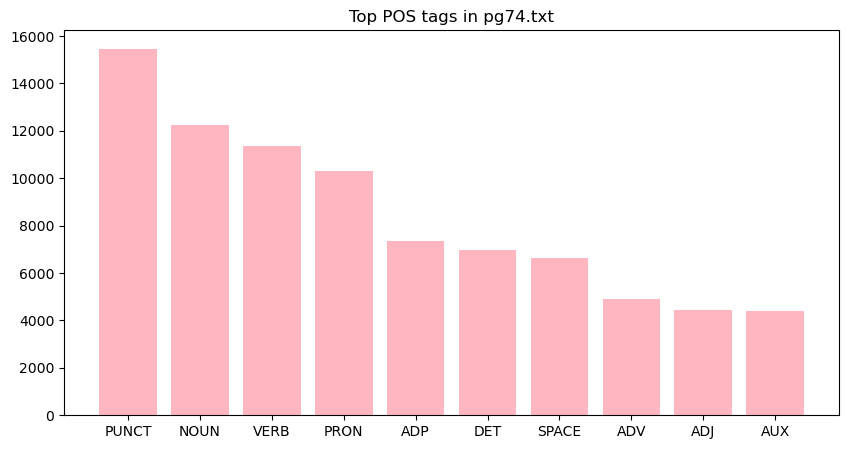

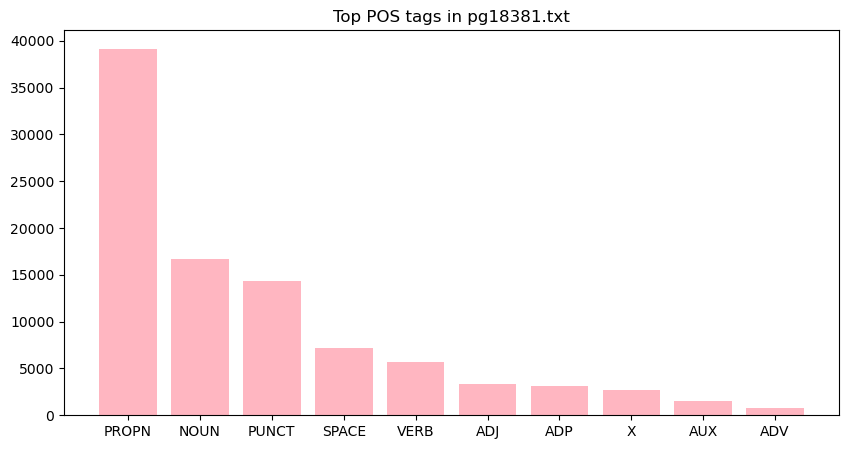

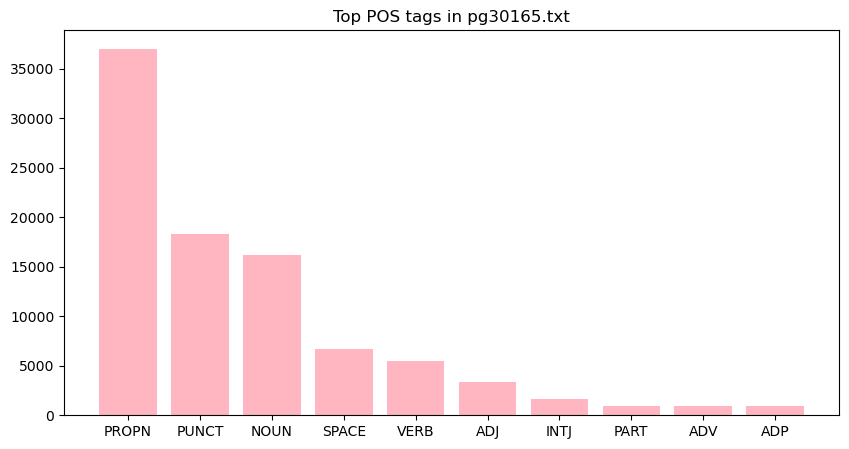

In [74]:
import matplotlib.pyplot as plt

for file, counts in pos_counts.items():
    labels, values = zip(*counts.most_common(10))
    plt.figure(figsize=(10,5))
    plt.bar(labels, values, color='lightpink')
    plt.title(f"Top POS tags in {file}")
    plt.show()

### **Bar Chart 1** : Comparison

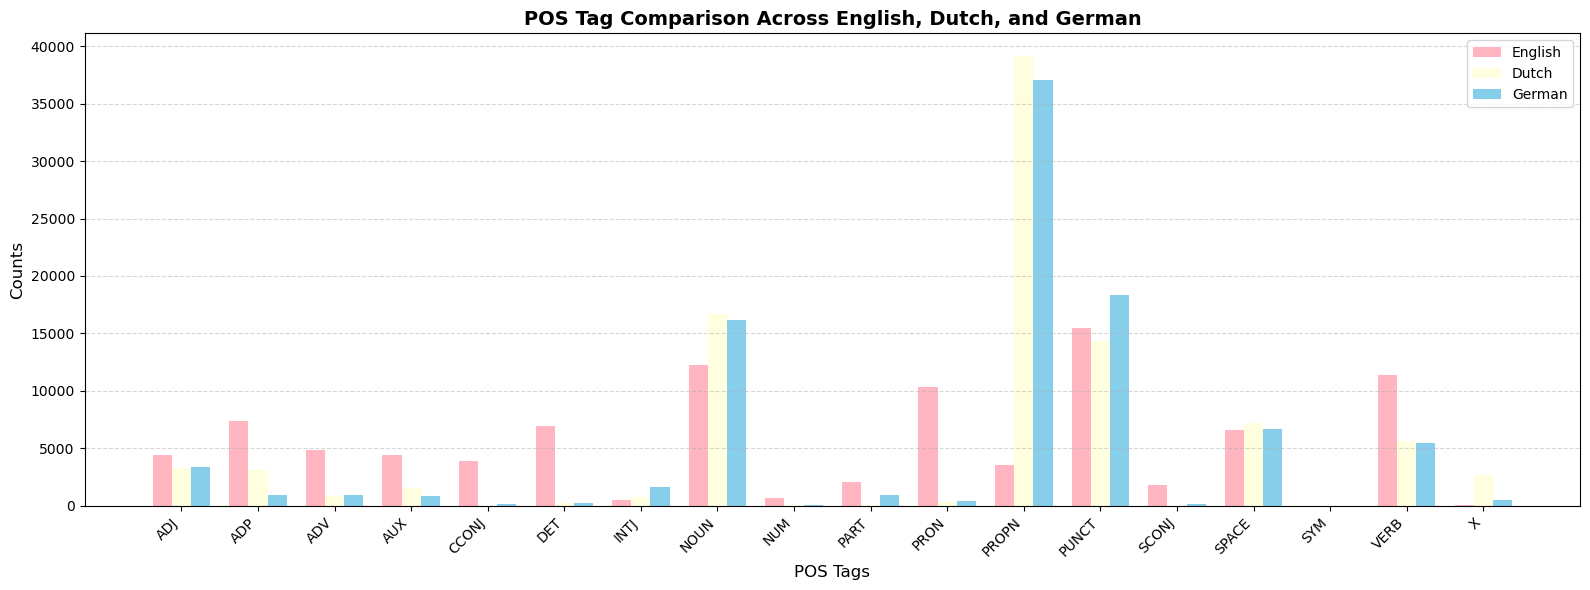

In [78]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter

file_lang = {
    "pg74.txt": "English",
    "pg18381.txt": "Dutch",
    "pg30165.txt": "German"
}

all_tags = set()
for counts in pos_counts.values():
    all_tags.update(counts.keys())
all_tags = sorted(all_tags)

df = pd.DataFrame({file_lang[file]: [pos_counts[file].get(tag, 0) for tag in all_tags]
                   for file in pos_counts}, index=all_tags)

x = np.arange(len(all_tags))
width = 0.25

fig, ax = plt.subplots(figsize=(16,6))

ax.bar(x - width, df['English'], width, label='English', color='lightpink')
ax.bar(x, df['Dutch'], width, label='Dutch', color='lightyellow')
ax.bar(x + width, df['German'], width, label='German', color='skyblue')

ax.set_xlabel('POS Tags', fontsize=12)
ax.set_ylabel('Counts', fontsize=12)
ax.set_title('POS Tag Comparison Across English, Dutch, and German', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(all_tags, rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()



# Part 1.3 - Conclusion
The Dutch and German texts show higher proper noun (PROPN) counts, suggesting more explicit naming of characters instead of using pronouns (that is much higher in the English translation). Instead of naming '_Tom_', the English language refers to him as '_he_'. This is a stylistic choice the translator made. The English translation also uses more verbs. Maybe the English text is more action-orientated than decriptive. Further, the English text contains more combines conjuctions. This suggests that the English translator tends to link clauses and phrases more explicitly with words like _and_, _but_, _or_, making the narrative flow in longer, connected sentences. These results can be explained by stylistic differences, but also account for linguistic differences: for example, in English, there are noticeably more DET tokens, which reflects English's tendency for explicit noun marking. 

# Part 2

In the final part of this assignment, I will investigate 5 sentences from the texts in the '_Docter Who_' fanfiction (1 sentence per story). I will use **Named Entity Recognition** to automatically annotate these sentences and compare these to manual annotation. 

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

# Dataset consisting of 1 sentence per story 
sentences = [
    "Missy was sitting on a chair in a house, maps and papers spread around, normally her planning was mental, but River had suggested a physical map to refer to and it was helpful.",
    "She sat in her bed, thinking over how she got here, her husband, a man, and occasionally women, she loved, who also made her want to slap him, he hadn’t known who she was, she thought back to something she once told her father, well, the Doctor not knowing who she was had killed her.",
    "He'd begged her, pleaded with Rose to just give up the power of the vortex, and when she'd dismissed him, when she'd told him she'd done it for him, because she wanted him safe...",
    "Rose brought a new joy into The Doctor’s life that he never thought he would feel again.",
    "The Doctor closed her eyes and let out an exasperated sigh, hands crossed over her chest in a defensive manner."
]

for i, sent in enumerate(sentences, 1):
    doc = nlp(sent)
    print(f"\nSentence {i}: {sent}\nNamed Entities:")
    if doc.ents:
        for ent in doc.ents:
            print(f"  {ent.text} ({ent.label_})")
    else:
        print("  No entities detected")


***

# Part 2 - Conclusion

My own (non-automatic) annotation has the following results: <br> 
Missy (**PERSON**), River (**PERSON**)(_it is interesting that the NER sees River as a LOC_) <br> 
Doctor (**PERSON**) <br>
Rose (**PERSON**) (_this the only one corresponding with the automatic recognition_) <br>
Rose (**PERSON**), Doctor (**PERSON**) <br>
Doctor (**PERSON**) <br>

So from this (very small) dataset, we could conclude that non-automatic annotation is better. However, this conclusion is based on only 5 sentences, and from the 5, 1 was correct. I think that SpaCy’s default NER model can capture clear, standard character names, but struggles with titles, honorifics, or multi-word character names (e.g., “_The Doctor_”) and names that depend on context. 